<a href="https://colab.research.google.com/github/pravallikai/Evolution-of-musical-trends-using-py/blob/main/notebooks/12_%E2%80%93_Genre_Cluster_Deep_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ======================================================
# NOTEBOOK 12 – Genre / Cluster Deep Analysis
# Understanding Musical Characteristics of Each Cluster
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
df = pd.read_csv("/content/spotify_pca_clusters.csv")   # <-- update name if needed
print("Shape:", df.shape)
df.head()

# 2. Required columns
features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'valence', 'tempo'
]

if 'cluster' not in df.columns:
    raise ValueError("❌ Cluster column missing. Run K-Means first.")

print("✔ Required columns present.")

# ------------------------------------------------------
# 3. Summary statistics per cluster
# ------------------------------------------------------
cluster_summary = df.groupby("cluster")[features].mean()
cluster_summary


Shape: (41106, 14)
✔ Required columns present.


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
cluster,,,,,,,,
0,0.498402,0.717620,-9.775723,0.067442,0.179736,0.774408,0.504033,124.879607
1,0.480251,0.338181,-12.939739,0.064928,0.697995,0.027732,0.418152,108.333592
2,0.450130,0.754077,-7.263894,0.084157,0.137571,0.028853,0.473058,145.807830
3,0.680945,0.678144,-8.370171,0.078299,0.224614,0.019561,0.735430,112.689332
4,0.337941,0.207709,-19.184736,0.047638,0.848464,0.807545,0.230197,105.731298


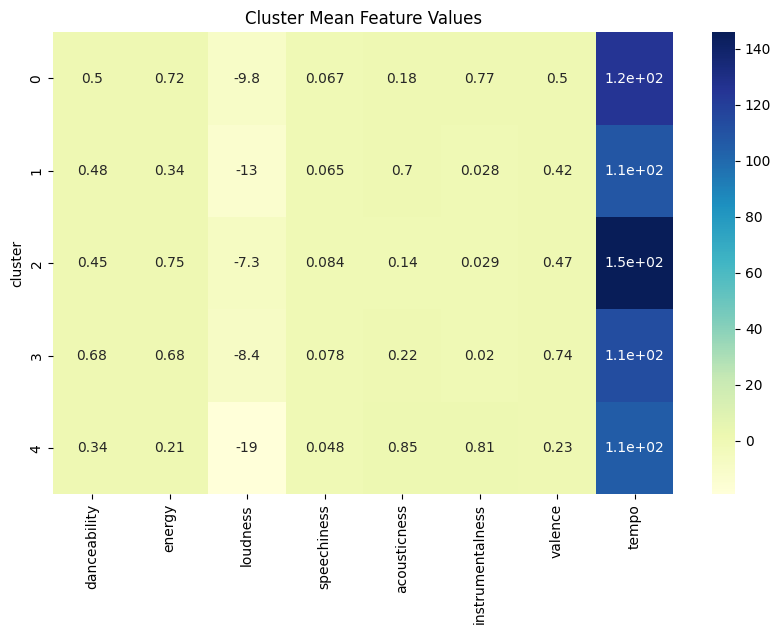

In [3]:
# Display heatmap of cluster means
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary, annot=True, cmap="YlGnBu")
plt.title("Cluster Mean Feature Values")
plt.show()


/tmp/ipython-input-2225805772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="cluster", palette="tab10")


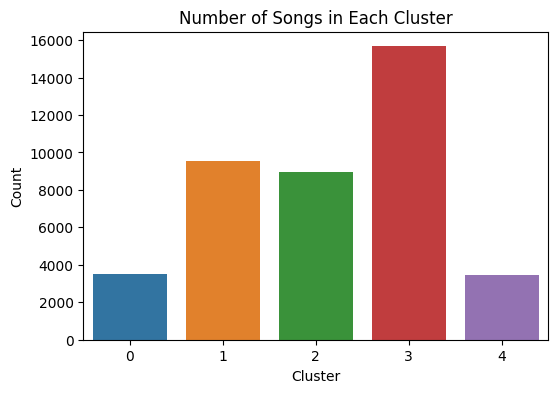

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="cluster", palette="tab10")
plt.title("Number of Songs in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


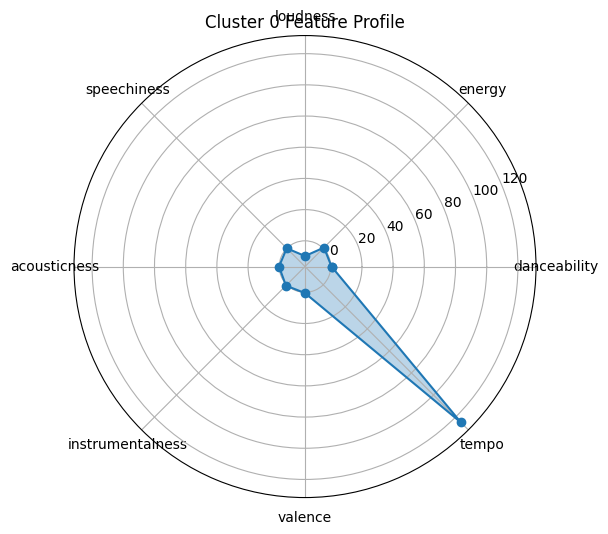

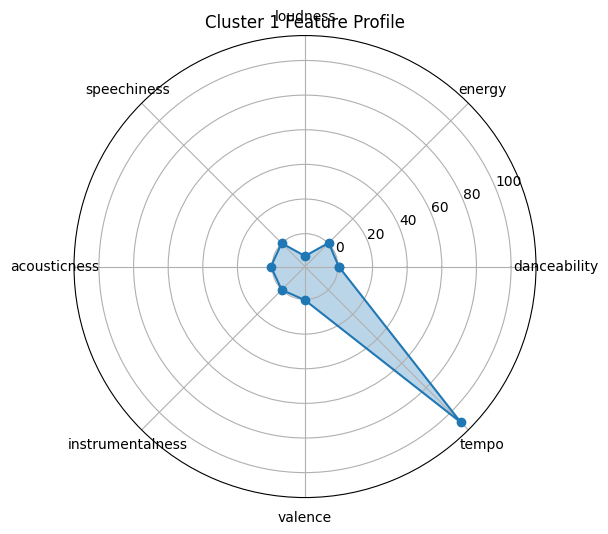

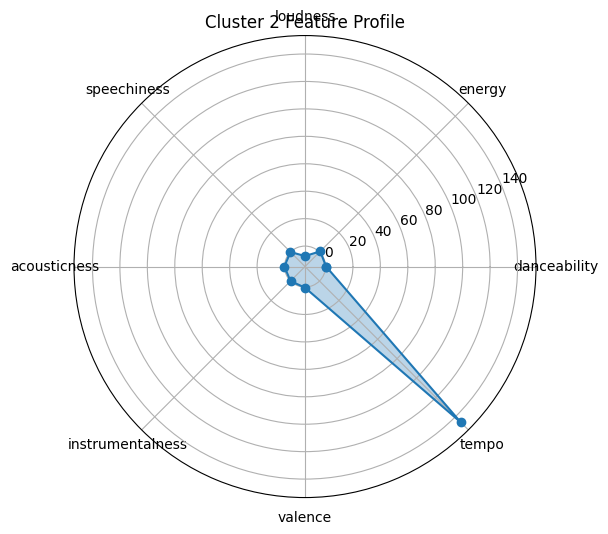

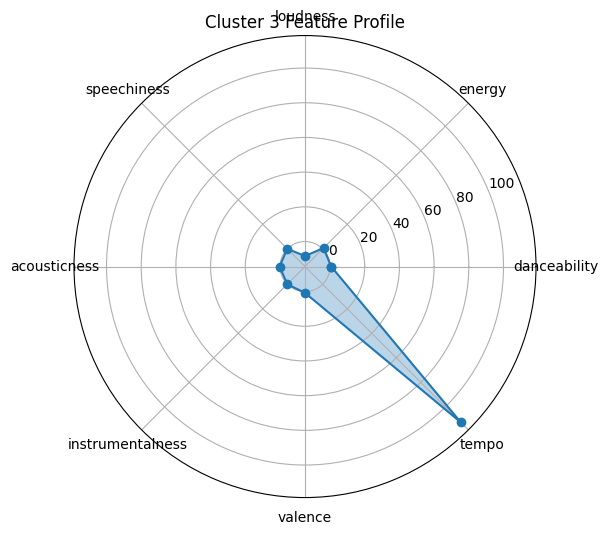

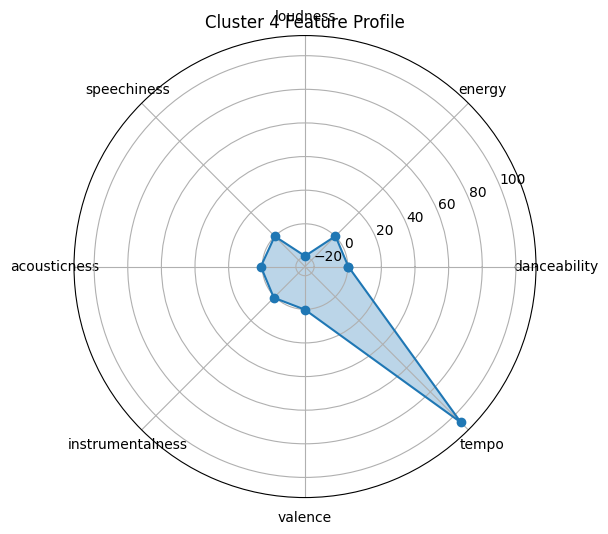

In [5]:
import numpy as np

def radar_plot(cluster_id, df, features):
    data = df[df['cluster']==cluster_id][features].mean().values

    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)
    stats = np.concatenate((data, [data[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    plt.figure(figsize=(6,6))
    plt.polar(angles, stats, marker='o')
    plt.fill(angles, stats, alpha=0.3)
    plt.title(f"Cluster {cluster_id} Feature Profile")
    plt.xticks(angles[:-1], features)
    plt.show()

# Generate radar charts for all clusters
for cl in sorted(df['cluster'].unique()):
    radar_plot(cl, df, features)


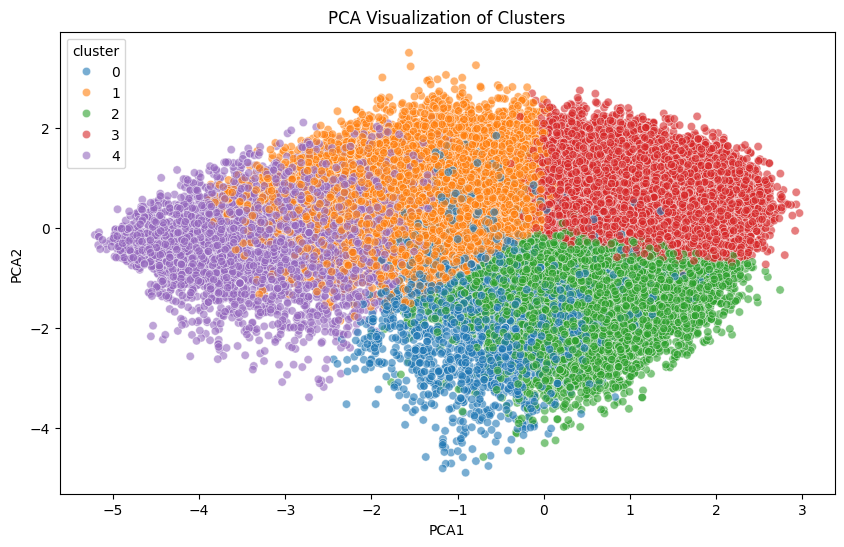

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="cluster", palette="tab10", alpha=0.6)
plt.title("PCA Visualization of Clusters")
plt.show()


In [7]:
def interpret_cluster(row):
    text = []

    if row['energy'] > 0.6:
        text.append("High energy – likely upbeat, electronic, or dance tracks.")
    else:
        text.append("Lower energy – calmer, softer, or acoustic songs.")

    if row['acousticness'] > 0.5:
        text.append("High acousticness – acoustic, unplugged, or mellow style.")
    if row['instrumentalness'] > 0.5:
        text.append("Strongly instrumental – minimal vocals, more instrumental focus.")

    if row['valence'] > 0.6:
        text.append("Positive mood / happy sound.")
    elif row['valence'] < 0.4:
        text.append("Emotional / sad / moody sound.")

    if row['danceability'] > 0.6:
        text.append("Highly danceable rhythm.")

    return " ".join(text)

cluster_interpretations = cluster_summary.apply(interpret_cluster, axis=1)
cluster_interpretations


,0
cluster,
0,"High energy – likely upbeat, electronic, or da..."
1,"Lower energy – calmer, softer, or acoustic son..."
2,"High energy – likely upbeat, electronic, or da..."
3,"High energy – likely upbeat, electronic, or da..."
4,"Lower energy – calmer, softer, or acoustic son..."


In [8]:
for idx, desc in cluster_interpretations.items():
    print(f"\n===== Cluster {idx} =====")
    print(desc)



===== Cluster 0 =====
High energy – likely upbeat, electronic, or dance tracks. Strongly instrumental – minimal vocals, more instrumental focus.

===== Cluster 1 =====
Lower energy – calmer, softer, or acoustic songs. High acousticness – acoustic, unplugged, or mellow style.

===== Cluster 2 =====
High energy – likely upbeat, electronic, or dance tracks.

===== Cluster 3 =====
High energy – likely upbeat, electronic, or dance tracks. Positive mood / happy sound. Highly danceable rhythm.

===== Cluster 4 =====
Lower energy – calmer, softer, or acoustic songs. High acousticness – acoustic, unplugged, or mellow style. Strongly instrumental – minimal vocals, more instrumental focus. Emotional / sad / moody sound.
